In [1]:
%matplotlib inline

from glob import glob

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import warnings
from functools import partial

In [6]:
def aggregate_histos(histo_filenames):
    histo_iter = (xr.open_dataset(fn) for fn in histo_filenames)
    cleaned = [ds.drop(['grid_time_start', 'grid_time_end']) for ds in histo_iter]
    N_histos = len(histo_filenames)
    ds = xr.combine_nested(cleaned, concat_dim='day', combine_attrs='override').sum(dim='day', keep_attrs=True)
    
    # Find the mean of the percentiles on each day.
    percentile_vars = [v for v in list(ds.variables.keys()) if 'percentile' in v]
    for v in percentile_vars:
        if 'thresholds' in v:
             pass
        else:
            ds[v] /= N_histos
    ds['track_maximum_distance_km'] /= N_histos
            
    return ds

Based on a ranking of daily Zdr/Kdp/Lightning fractions, here are the quartiles, from smallest lightning fraction to greatest.

Manually analyzed by using the track_count_constmelt.csv output.

Note that the days with the low lightning fractions have very many tracks - warm rain dominated cells. Only 3 days to get 25% of all tracks in the whole dataset. Meanwhile, high lightning fraction days have progressively fewer tracks: 5, 7, and 10 days for increasing lightning fractions quartiles.



In [2]:

# By count of all tracks on the day
lightning_fraction_quartiles_by_all_track_count = [
    ("2022-08-31", "2022-09-15", "2022-09-01"),
    ("2022-08-25", "2022-08-08", "2022-07-13", "2022-08-07", "2022-08-13"),
    ("2022-09-17", "2022-06-04", "2022-08-02", "2022-07-12", "2022-08-27", "2022-08-01", "2022-07-02"),
    ("2022-08-06", "2022-06-22", "2022-06-02", "2022-07-06", "2022-08-21", "2022-08-03", "2022-07-14", "2022-07-28", "2022-07-29", "2022-06-17"),
]


# By count of all zdr_kdp_ltg tracks on the day
lightning_fraction_quartiles_by_zdr_kdp_ltg_count = [
    ("2022-08-31", "2022-09-15", "2022-09-01", "2022-08-25", "2022-08-08", "2022-07-13", "2022-08-07", "2022-08-13"),
    ("2022-09-17", "2022-06-04", "2022-08-02", "2022-07-12", "2022-08-27", "2022-08-01"),
    ("2022-07-02", "2022-08-06", "2022-06-22", "2022-06-02", "2022-07-06", "2022-08-21"),
    ("2022-08-03", "2022-07-14", "2022-07-28", "2022-07-29", "2022-06-17"),
]

quartiles_by_all_track_count = False
if quartiles_by_all_track_count:
    lightning_fraction_quartiles = lightning_fraction_quartiles_by_all_track_count
else:
    lightning_fraction_quartiles = lightning_fraction_quartiles_by_zdr_kdp_ltg_count
    
# this_quartile = None
this_quartile = 0

In [3]:
track_categories = [
    "track_has_any",
    "track_has_zdr_kdp_ltg",
    "track_has_zdr_kdp_only",
    "track_has_zdr_ltg_only",
    "track_has_zdr_only",
    "track_has_nothing",
    "track_has_kdp_only",
    "track_has_kdp_ltg_only",
    "track_has_ltg_only",
    ]
zdr_categories = [c for c in track_categories if 'zdr' in c]
kdp_categories = [c for c in track_categories if 'kdp' in c]
zdr_ltg_categories = [c for c in zdr_categories if 'ltg' in c]
kdp_ltg_categories = [c for c in kdp_categories if 'ltg' in c]

this_category = "track_has_any"
const_melt = True

In [4]:
# all_histos_both_melt = sorted(glob('/efs/tracer/NEXRAD/tobac_Save_2022*/histogram_data*.nc'))
# const_melt_histos = sorted(glob('/efs/tracer/NEXRAD/tobac_Save_2022*/histogram_data*4400.nc'))
# # The 4 June case has the same melting height our constant case
# vary_melt_histos = sorted([hf for hf in all_histos_both_melt if not(hf in const_melt_histos)] 
#                     + glob('/efs/tracer/NEXRAD/tobac_Save_20220604/histogram_data*4400.nc'))

# # Just look at one day
# # all_histos_both_melt = sorted(glob('/efs/tracer/NEXRAD/tobac_Save_20220807/histogram_data*.nc'))
# # const_melt_histos = sorted(glob('/efs/tracer/NEXRAD/tobac_Save_20220807/histogram_data*4400.nc'))

# # for hf in zip(const_melt_histos, vary_melt_histos):
#     # print(hf)

# assert len(vary_melt_histos) == len(const_melt_histos)

# if const_melt:
#     all_histos = const_melt_histos
# else:
#     all_histos = vary_melt_histos

In [5]:
lightning_fraction_quartile_paths = [
    ['/efs/tracer/NEXRAD/tobac_Save_{1}/histogram_data_{0}_melt4400.nc'.format(
        this_category.replace('_','-'), di.replace('-', '')) for di in ds] 
    for ds in lightning_fraction_quartiles]


In [7]:
# all days
pathstring_all_days = '/efs/tracer/NEXRAD/tobac_Save_2022*/histogram_data_{0}_melt4400.nc'.format(this_category.replace('_','-'))

if this_quartile is not None:
    all_histos = lightning_fraction_quartile_paths[this_quartile]
else:
    all_histos = sorted(glob(pathstring_all_days))
print(all_histos)

['/efs/tracer/NEXRAD/tobac_Save_20220831/histogram_data_track-has-any_melt4400.nc', '/efs/tracer/NEXRAD/tobac_Save_20220915/histogram_data_track-has-any_melt4400.nc', '/efs/tracer/NEXRAD/tobac_Save_20220901/histogram_data_track-has-any_melt4400.nc', '/efs/tracer/NEXRAD/tobac_Save_20220825/histogram_data_track-has-any_melt4400.nc', '/efs/tracer/NEXRAD/tobac_Save_20220808/histogram_data_track-has-any_melt4400.nc', '/efs/tracer/NEXRAD/tobac_Save_20220713/histogram_data_track-has-any_melt4400.nc', '/efs/tracer/NEXRAD/tobac_Save_20220807/histogram_data_track-has-any_melt4400.nc', '/efs/tracer/NEXRAD/tobac_Save_20220813/histogram_data_track-has-any_melt4400.nc']


In [7]:
# # Diagnose a variable that doesn't seem to be there.
# for hfn in all_histos:
#     hds = xr.open_dataset(hfn)
#     findme = 'histogram_feature_flash_count_area_time_norm_feature_kdpcol_area_time_norm'
#     print(hfn.split('/')[-2], findme in hds.variables)

In [8]:
# odd_ds = xr.open_dataset('/efs/tracer/NEXRAD/tobac_Save_20220803/histogram_data_track-has-zdr-kdp-only_melt4400.nc')

In [9]:
# odd_ds

In [10]:
histo_ds2 = xr.open_dataset(all_histos[0])

In [11]:
histo_ds2

<xarray.Dataset>
Dimensions:                                                                                         (
                                                                                                     feature_flash_count_area_time_norm_bin: 21,
                                                                                                     feature_kdpcol_area_time_norm_bin: 21,
                                                                                                     feature_kdpcol_total_area_time_norm_bin: 21,
                                                                                                     feature_kdpvol_area_time_norm_bin: 21,
                                                                                                     feature_kdpwt_total_area_time_norm_bin: 21,
                                                                                                     ...
                                                                                                     feature_flash_count_bin: 21,
                                                                                                     feature_kdpcol_bin: 21,
                                                                                                     feature_rhvdeficitcol_bin: 21,
                                                                                                     feature_zdrvol_bin: 21,
                                                                                                     percentile_thresholds: 3,
                                                                                                     track_count: 1)
Coordinates: (12/24)
  * feature_flash_count_area_time_norm_bin                                                          (feature_flash_count_area_time_norm_bin) float64 ...
  * feature_kdpcol_area_time_norm_bin                                                               (feature_kdpcol_area_time_norm_bin) float64 ...
  * feature_kdpcol_total_area_time_norm_bin                                                         (feature_kdpcol_total_area_time_norm_bin) float64 ...
  * feature_kdpvol_area_time_norm_bin                                                               (feature_kdpvol_area_time_norm_bin) float64 ...
  * feature_kdpwt_total_area_time_norm_bin                                                          (feature_kdpwt_total_area_time_norm_bin) float64 ...
  * feature_nearby_count_10km_bin                                                                   (feature_nearby_count_10km_bin) float64 ...
    ...                                                                                              ...
  * feature_flash_count_bin                                                                         (feature_flash_count_bin) float64 ...
  * feature_kdpcol_bin                                                                              (feature_kdpcol_bin) float64 ...
  * feature_rhvdeficitcol_bin                                                                       (feature_rhvdeficitcol_bin) float64 ...
  * feature_zdrvol_bin                                                                              (feature_zdrvol_bin) float64 ...
  * percentile_thresholds                                                                           (percentile_thresholds) int64 ...
  * track_count                                                                                     (track_count) int64 ...
Data variables: (12/258)
    histogram_feature_flash_count_area_time_norm_feature_kdpcol_area_time_norm                      (feature_flash_count_area_time_norm_bin, feature_kdpcol_area_time_norm_bin) int64 ...
    histogram_feature_flash_count_area_time_norm_feature_kdpcol_total_area_time_norm                (feature_flash_count_area_time_norm_bin, feature_kdpcol_total_area_time_norm_bin) int64 ...
    histogram_feature_flash_count_area_time_norm_feature_kdpvol_area_time

In [13]:
agg_histo_ds = aggregate_histos(all_histos)

In [14]:
from itertools import combinations
paper_vars = ['feature_flash_count_area_time_norm',
 'feature_zdrwt_total_area_time_norm',
 'feature_kdpwt_total_area_time_norm',
 'feature_rhvdeficitwt_total_area_time_norm',
 'feature_nearby_count_20km_area_time_norm',
]

In [15]:
agg_histo_ds

<xarray.Dataset>
Dimensions:                                                                                         (
                                                                                                     feature_flash_count_area_time_norm_bin: 21,
                                                                                                     feature_kdpcol_area_time_norm_bin: 21,
                                                                                                     feature_kdpcol_total_area_time_norm_bin: 21,
                                                                                                     feature_kdpvol_area_time_norm_bin: 21,
                                                                                                     feature_kdpwt_total_area_time_norm_bin: 21,
                                                                                                     ...
                                                                                                     feature_flash_count_bin: 21,
                                                                                                     feature_kdpcol_bin: 21,
                                                                                                     feature_rhvdeficitcol_bin: 21,
                                                                                                     feature_zdrvol_bin: 21,
                                                                                                     percentile_thresholds: 3,
                                                                                                     track_count: 1)
Coordinates: (12/24)
  * feature_flash_count_area_time_norm_bin                                                          (feature_flash_count_area_time_norm_bin) float64 ...
  * feature_kdpcol_area_time_norm_bin                                                               (feature_kdpcol_area_time_norm_bin) float64 ...
  * feature_kdpcol_total_area_time_norm_bin                                                         (feature_kdpcol_total_area_time_norm_bin) float64 ...
  * feature_kdpvol_area_time_norm_bin                                                               (feature_kdpvol_area_time_norm_bin) float64 ...
  * feature_kdpwt_total_area_time_norm_bin                                                          (feature_kdpwt_total_area_time_norm_bin) float64 ...
  * feature_nearby_count_10km_bin                                                                   (feature_nearby_count_10km_bin) float64 ...
    ...                                                                                              ...
  * feature_flash_count_bin                                                                         (feature_flash_count_bin) float64 ...
  * feature_kdpcol_bin                                                                              (feature_kdpcol_bin) float64 ...
  * feature_rhvdeficitcol_bin                                                                       (feature_rhvdeficitcol_bin) float64 ...
  * feature_zdrvol_bin                                                                              (feature_zdrvol_bin) float64 ...
  * percentile_thresholds                                                                           (percentile_thresholds) int64 ...
  * track_count                                                                                     (track_count) int64 ...
Data variables: (12/256)
    histogram_feature_flash_count_area_time_norm_feature_kdpcol_area_time_norm                      (feature_flash_count_area_time_norm_bin, feature_kdpcol_area_time_norm_bin) int64 ...
    histogram_feature_flash_count_area_time_norm_feature_kdpcol_total_area_time_norm                (feature_flash_count_area_time_norm_bin, feature_kdpcol_total_area_time_norm_bin) int64 ...
    histogram_feature_flash_count_area_time_norm_feature_kdpvol_area_time

# Plotting from the standardized histogram dataset

In [16]:
def track_count_table(histo_ds):
    all_dims = list(histo_ds.dims.keys())
    dims_to_remove = [d for d in all_dims if d != 'track_count']
    ds = histo_ds.drop_dims(dims_to_remove)
    return ds.to_dataframe()

In [17]:
track_count_table(histo_ds2)

grid_time_start           grid_time_end  \
track_count                                                   
0           2022-08-31 00:00:38.182 2022-08-31 23:58:03.188   

             track_has_zdr_kdp_ltg  track_has_zdr_kdp_only  \
track_count                                                  
0                               42                       7   

             track_has_zdr_ltg_only  track_has_zdr_only  track_has_nothing  \
track_count                                                                  
0                                14                   6                616   

             track_has_kdp_only  track_has_kdp_ltg_only  track_has_ltg_only  \
track_count                                                                   
0                             0                       0                   0   

             track_maximum_distance_km  
track_count                             
0                                 90.0

In [18]:
track_count_table(agg_histo_ds)

track_has_zdr_kdp_ltg  track_has_zdr_kdp_only  \
track_count                                                  
0                              445                     109   

             track_has_zdr_ltg_only  track_has_zdr_only  track_has_nothing  \
track_count                                                                  
0                               155                 118               3021   

             track_has_kdp_only  track_has_kdp_ltg_only  track_has_ltg_only  \
track_count                                                                   
0                             0                       1                   1   

             track_maximum_distance_km  
track_count                             
0                                 90.0

In [19]:
def plot_1d_hists(histo_ds):
    all_dims = list(histo_ds.dims.keys())
    dims_to_remove = [d for d in all_dims if d != 'percentile_thresholds']
    try:
        percentile_ds = histo_ds.drop_dims(dims_to_remove).drop('grid_time_start').drop('grid_time_end')
    except ValueError:
        print("Not dropping grid time start and end - not in the dataset")
        percentile_ds = histo_ds.drop_dims(dims_to_remove)
    percentile_ds = percentile_ds.drop('track_maximum_distance_km')
    
    # n_vars = len(percentile_ds.variables.keys())
    # violin_fig, violin_ax = plt.subplots(1,n_vars, figsize=(3,n_vars))
    
    
    all_figs = []
    for var in percentile_ds:
        bins = histo_ds[var.replace('percentile_','')+'_bin']
        counts = histo_ds[var.replace('percentile_','')]
        description = counts.attrs['long_name']
        fig, ax = plt.subplots(1,1)

        # ax.step(bins, counts, where='mid')
        ax.fill_between(bins, counts, step='mid')
        for thresh, thresh_val in zip(percentile_ds['percentile_thresholds'], percentile_ds[var]):
            ax.axvline(thresh_val, color='k', linewidth=0.5)
            ax.text(thresh_val, counts.max()*.9, f' {thresh_val:3.2e}')
        # ax.set_xlim(-1,15)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_ylabel("Number of tracks")
        ax.set_xlabel(description)
        ax.set_title("Track property distribution")
        all_figs.append(fig)
        
    return all_figs #, violin_fig, 

Not dropping grid time start and end - not in the dataset


/tmp/ipykernel_6655/3783165694.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,1)


[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

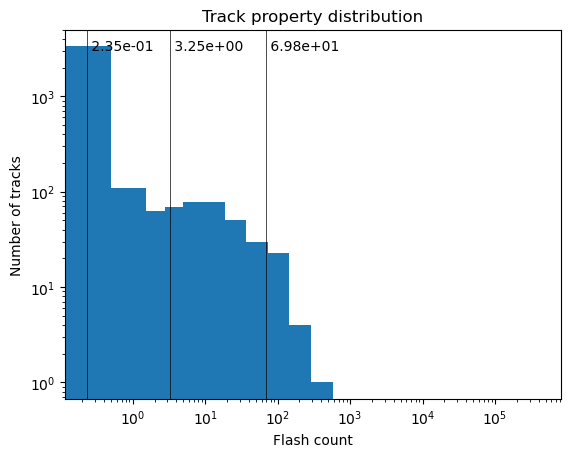

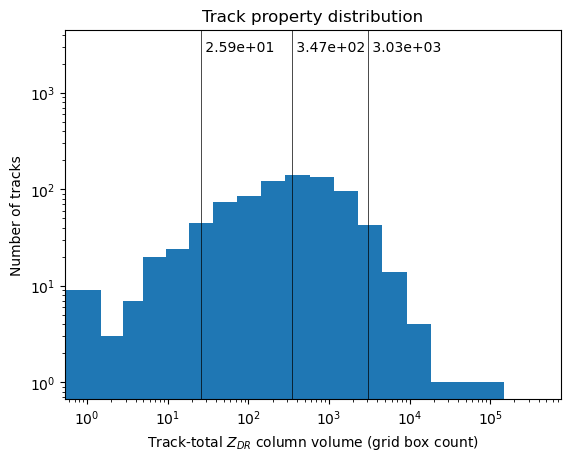

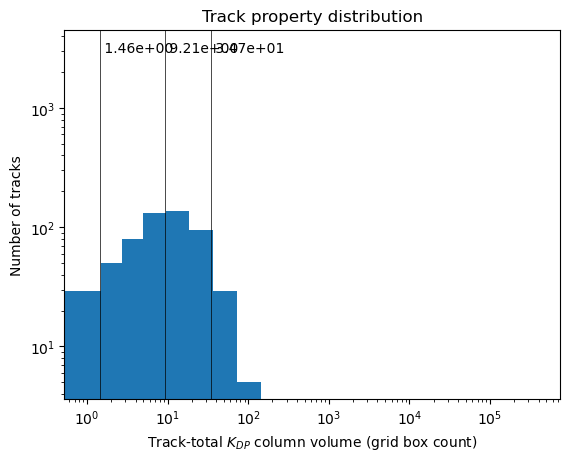

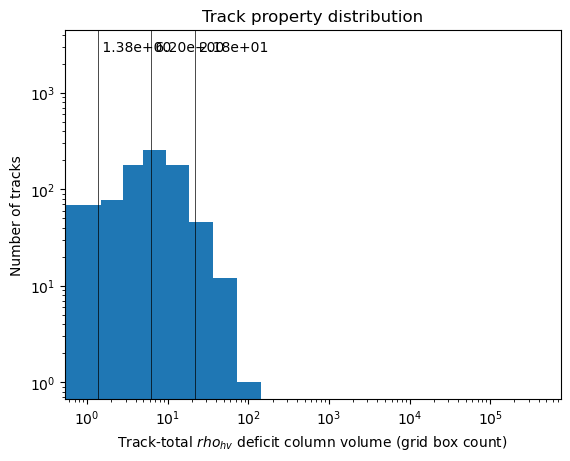

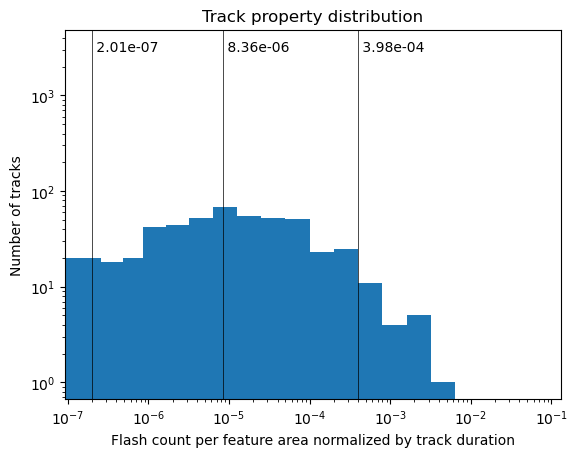

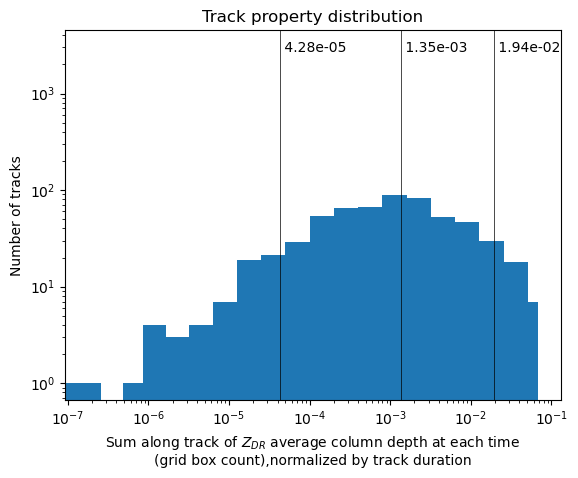

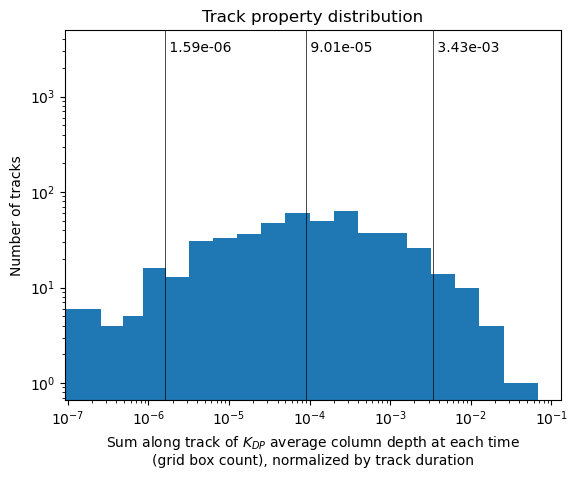

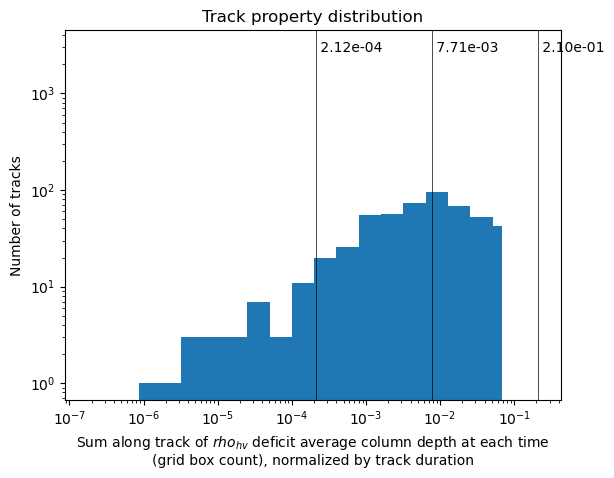

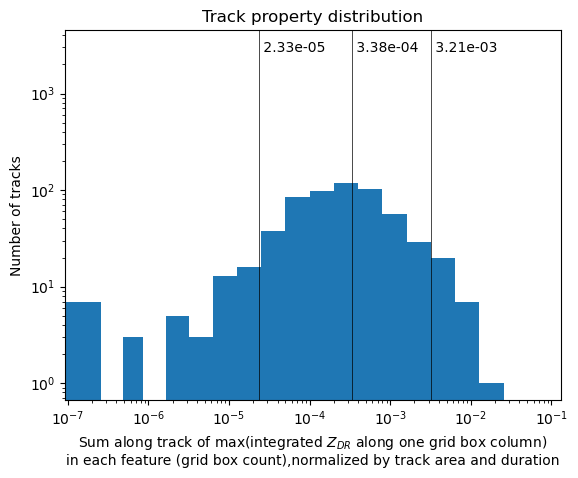

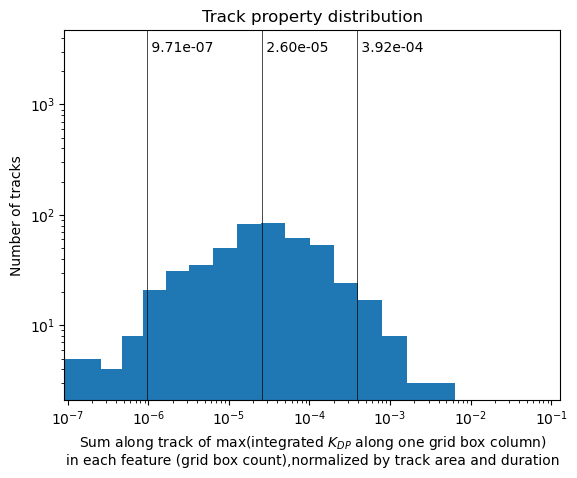

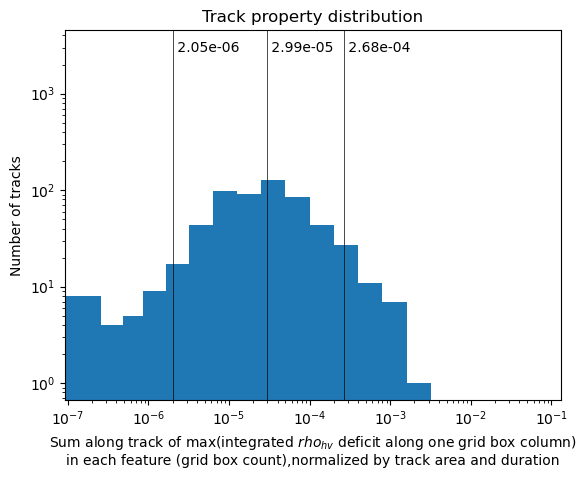

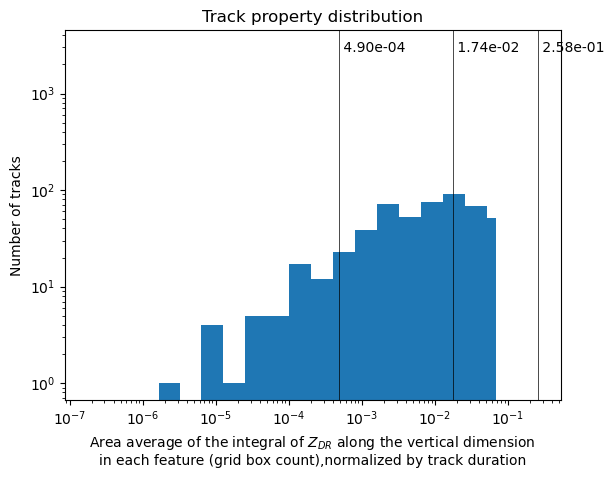

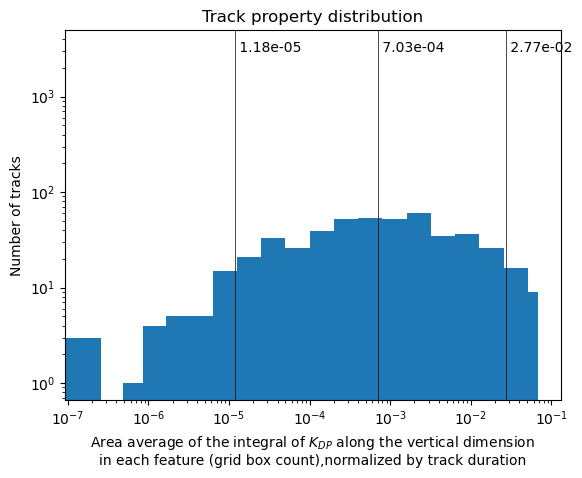

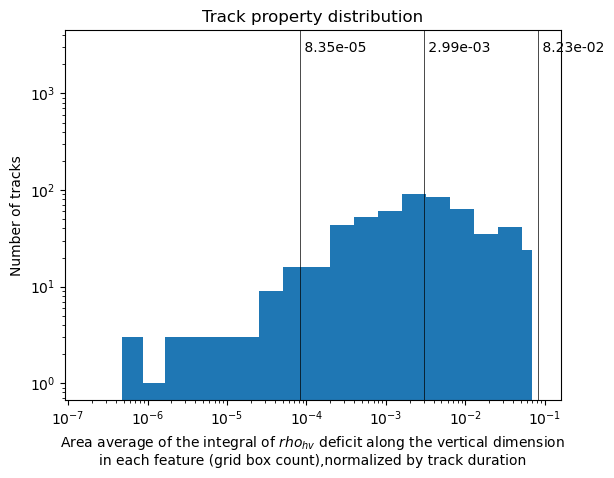

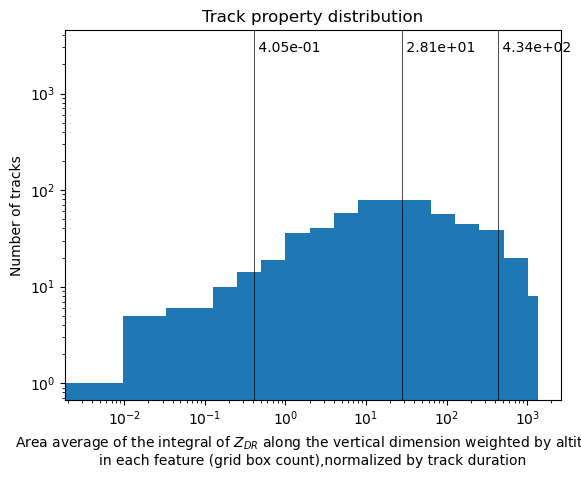

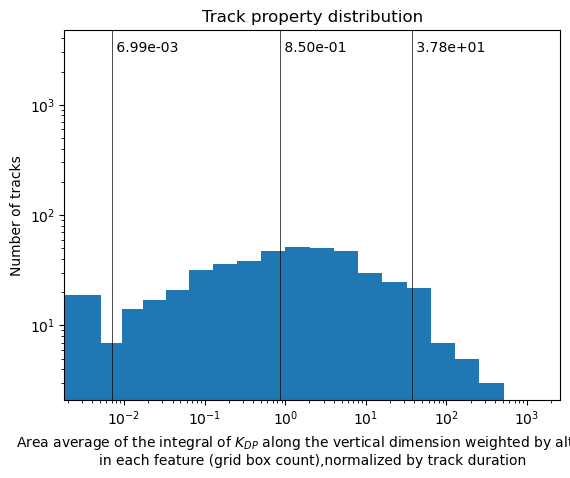

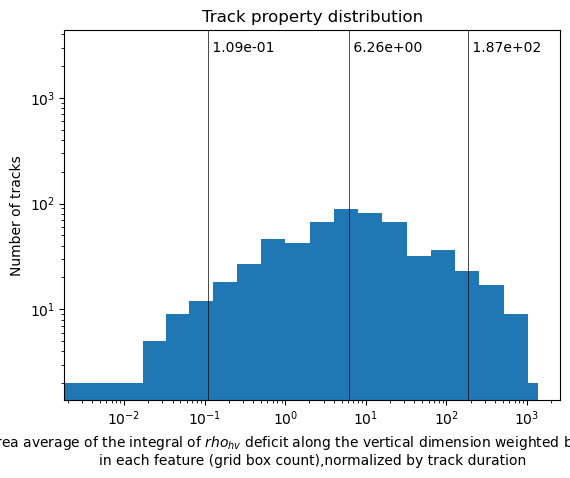

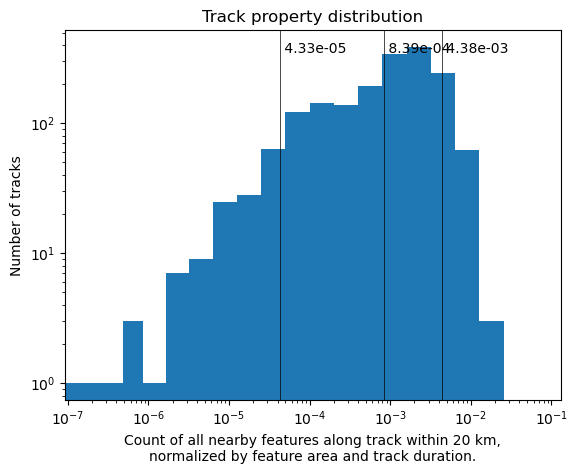

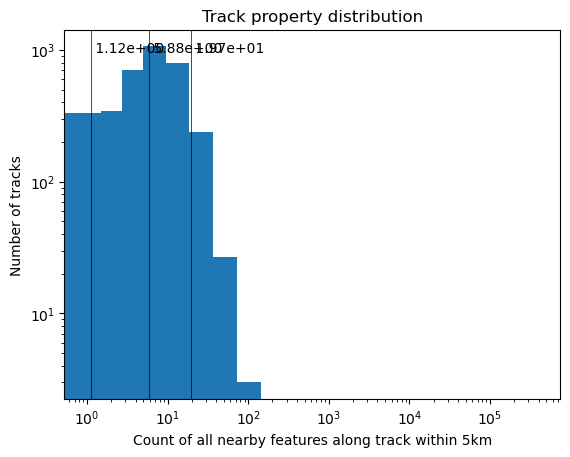

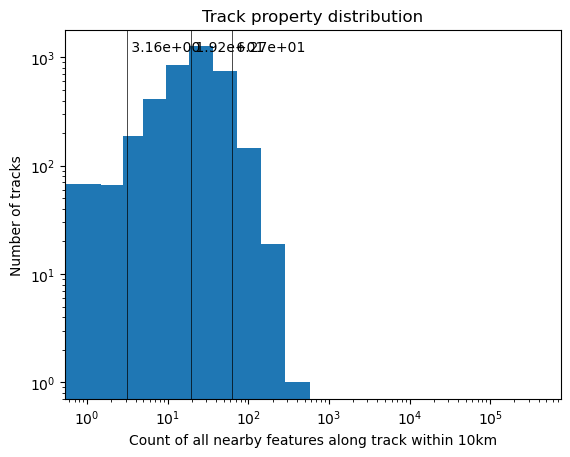

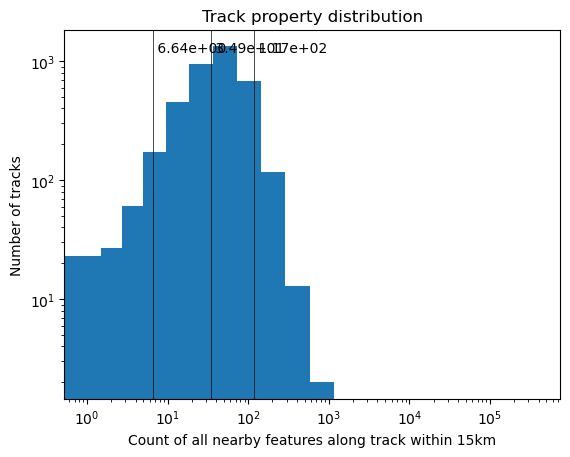

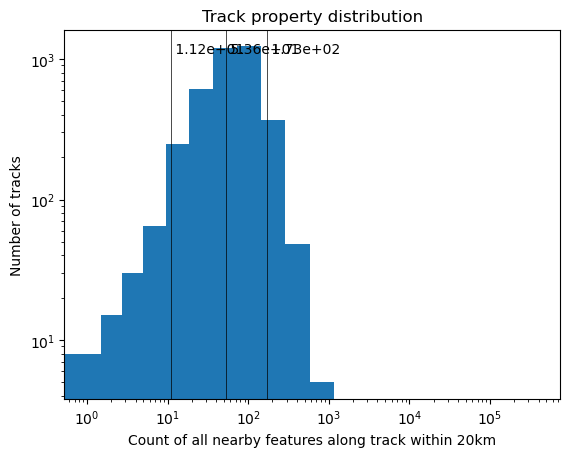

In [20]:
plot_1d_hists(agg_histo_ds)

In [21]:
# plot_1d_hists(histo_ds2)

In [22]:
from matplotlib.colors import LogNorm

def plot_2d_hists(histo_ds_all, plot_hist_names=None, normed=True):
    # Look at a representative dataset
    histo_ds = histo_ds_all[0]
    # Find the 2D histogram variables
    all_histo_names = sorted(k for k in histo_ds.data_vars.keys() if (len(histo_ds[k].dims)==2))
    # print(all_histo_names)          
    # only plot the normed histograms
    if plot_hist_names is None:
        if normed == True:
            plot_hist_names = [s for s in all_histo_names if (s.count('norm') == 2)]
        else:
            plot_hist_names = [s for s in all_histo_names if s.count('norm') == 0]
    
    hist_count = len(plot_hist_names)
    print(f"plotting {hist_count} histograms")
    combo_rows = int(np.ceil(hist_count/3))
    fig, axs = plt.subplots(combo_rows,3, figsize=(2*8, 2*combo_rows*2))
    all_axs = axs.flatten()
    
    for axi, var_name in enumerate(plot_hist_names):
        all_h = sum(hds[var_name] for hds in histo_ds_all)
        h = histo_ds[var_name]
        ax = all_axs[axi]
        bins = h[h.coords.dims[0]].values, h[h.coords.dims[1]].values
        all_h.T.plot(levels=17, norm=LogNorm(vmin=1, vmax=128), ax=ax)
        # Need to have the lower limit be the first bin so that it's nonnegative.
        ax.axis((bins[0][1]/10, bins[0][-1], bins[1][1]/10, bins[1][-1]))
        # ax.axis((0.1, 2048, 0.1, 2048))
        ax.set_xscale('log')
        ax.set_yscale('log')

    fig.tight_layout()
    return fig

In [23]:
def plot_paper_hists(histo_ds_all, paper_vars, normed=True):
    histo_ds = histo_ds_all[0]
    
    paper_var_histos = list(combinations(paper_vars,2))
    subplot_rows_cols = len(paper_vars)-1

    fig, axs = plt.subplots(subplot_rows_cols,subplot_rows_cols, figsize=(2*8.5, 2*8.5))
    all_axs = axs.flatten()

    # Plot a the triangular upper half
    row, column = 0, 0
    for paper_histo in paper_var_histos:
        var_name = '_'.join(['histogram', paper_histo[0], paper_histo[1]])
        # print(row, column, var_name)
        
        all_h = sum(hds[var_name] for hds in histo_ds_all)
        h = histo_ds[var_name]
        ax = axs[row,column]
        bins = h[h.coords.dims[0]].values, h[h.coords.dims[1]].values
        art = all_h.T.plot(levels=17, norm=LogNorm(vmin=1, vmax=128), ax=ax, cbar_ax=axs[3,0], cbar_kwargs={'label':None})
        art.set_rasterized(True)
        # Need to have the lower limit be the first bin so that it's nonnegative.
        ax.axis((bins[0][1]/10, bins[0][-1], bins[1][1]/10, bins[1][-1]))
        # ax.axis((0.1, 2048, 0.1, 2048))
        ax.set_xscale('log')
        ax.set_yscale('log')

        if column == 3: 
            row += 1
            column = row
        else:
            column += 1

    fig.tight_layout()
    return fig

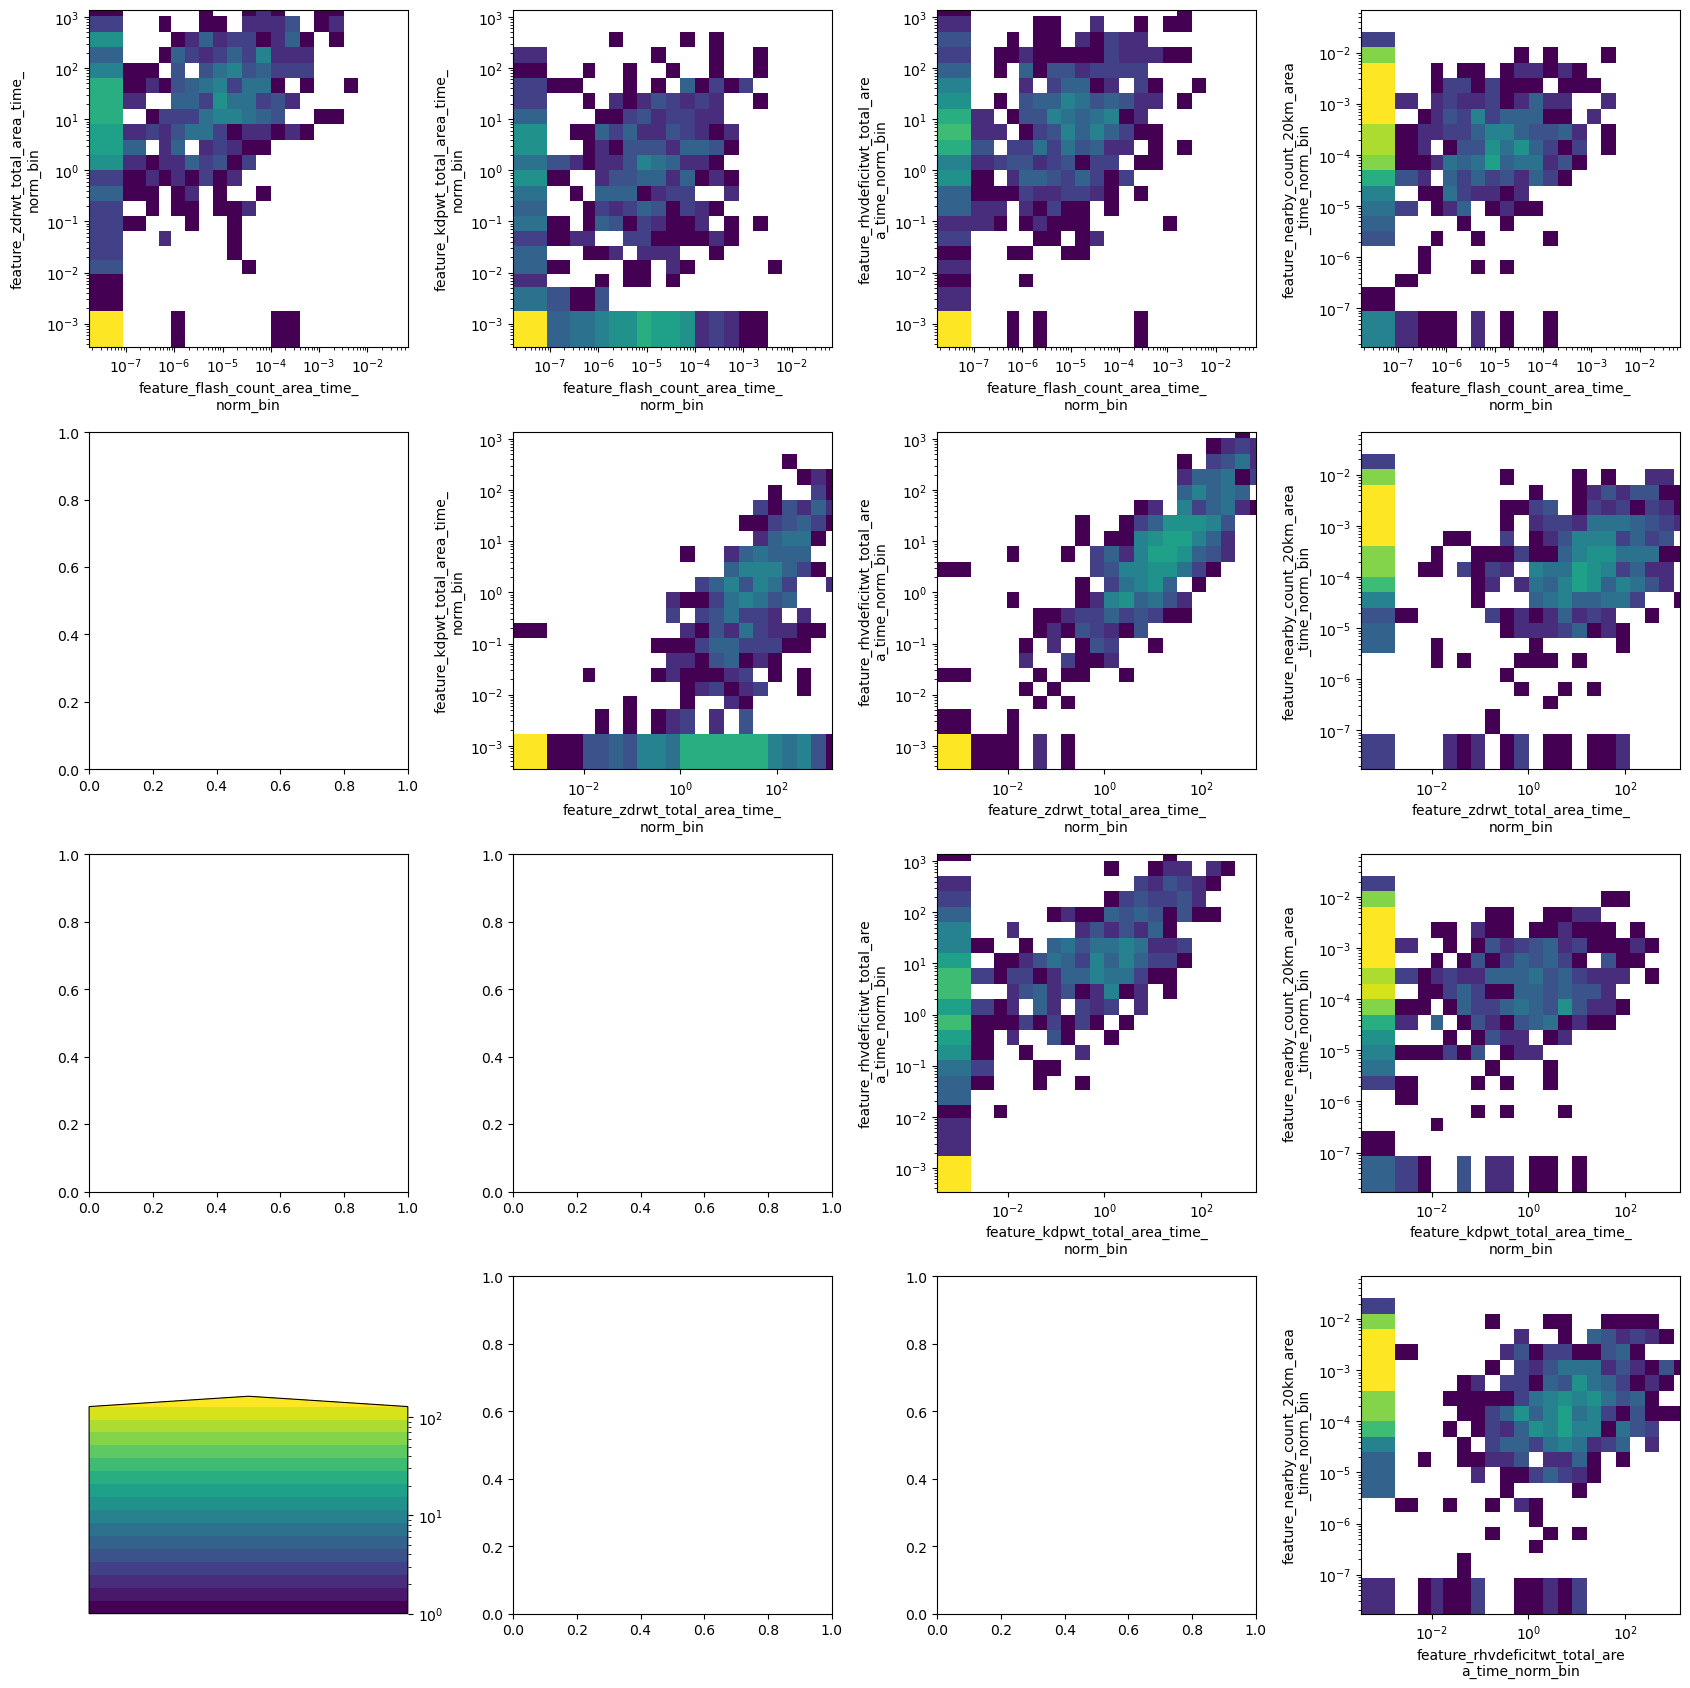

In [24]:
fig_paper = plot_paper_hists([agg_histo_ds], paper_vars)

plotting 91 histograms


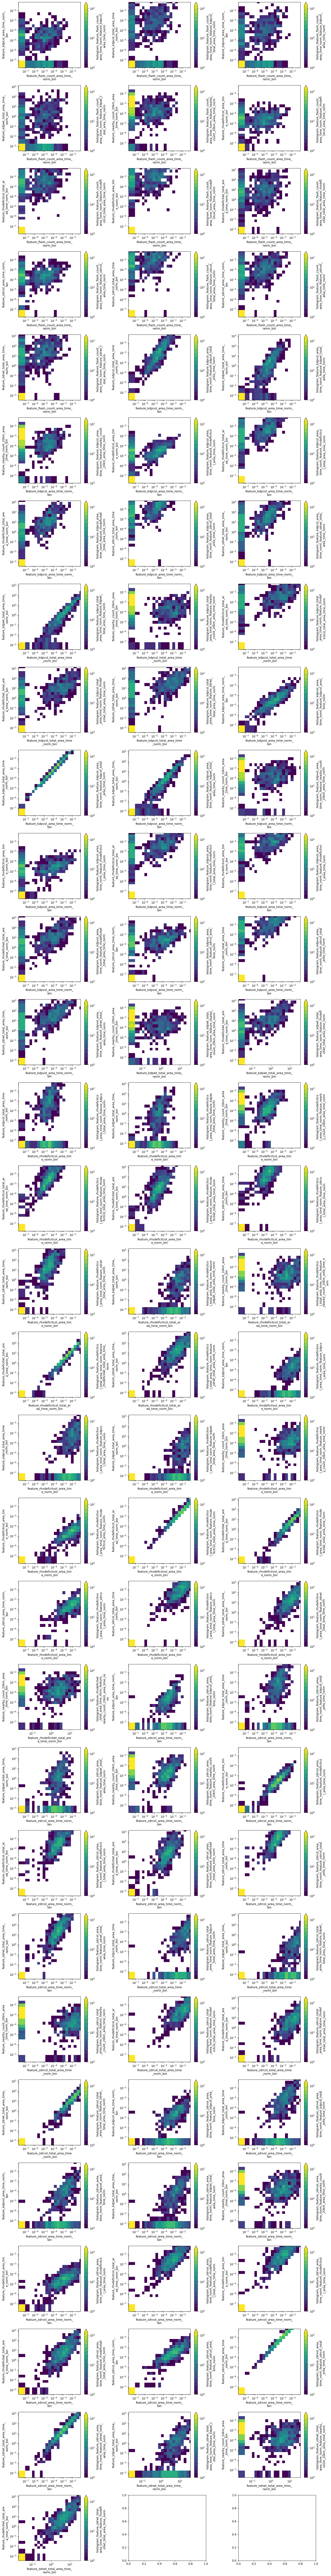

In [25]:
show_normed = True
if show_normed==False:
    norm_extension = '_raw'
else:
    norm_extension = ''

fig = plot_2d_hists([agg_histo_ds], normed=show_normed)

In [26]:
if this_quartile is not None:
    quartile_marker = f'_Q{this_quartile}'
else:
    quartile_marker = ''

if quartiles_by_all_track_count == False:
    quartile_count_type = '-by-zdr-kdp-ltg-count'
else:
    quartile_count_type = ''

In [27]:

if const_melt:
    fig.savefig('joint_histos_constmelt'+norm_extension+'_'+this_category.replace('_','-')+quartile_marker+quartile_count_type+'.pdf')
    fig_paper.savefig('joint_histos_constmelt_paper'+norm_extension+'_'+this_category.replace('_','-')+quartile_marker+quartile_count_type+'.pdf')
else:
    fig.savefig('joint_histos_varymelt'+norm_extension+'_'+this_category.replace('_','-')+'.pdf')
    fig_paper.savefig('joint_histos_varymelt_paper'+norm_extension+'_'+this_category.replace('_','-')+'.pdf')

In [28]:
# plot_2d_hists([histo_ds, histo_ds2])

## Consolidated histograms to match Brunner et al. (2023)

In [7]:
print(zdr_categories)
print(kdp_categories)
print(zdr_ltg_categories)
print(kdp_ltg_categories)

['track_has_zdr_kdp_ltg', 'track_has_zdr_kdp_only', 'track_has_zdr_ltg_only', 'track_has_zdr_only']
['track_has_zdr_kdp_ltg', 'track_has_zdr_kdp_only', 'track_has_kdp_only', 'track_has_kdp_ltg_only']
['track_has_zdr_kdp_ltg', 'track_has_zdr_ltg_only']
['track_has_zdr_kdp_ltg', 'track_has_kdp_ltg_only']


In [26]:
path_template = '/efs/tracer/NEXRAD/tobac_Save_2022*/histogram_data_{0}_melt4400.nc'
# all days
from itertools import chain
pathstrings_all_zdr = list(
    [(c, sorted(glob(path_template.format(c.replace('_','-'))))) for c in zdr_categories]
)
pathstrings_zdr_ltg = list(
    [(c, sorted(glob(path_template.format(c.replace('_','-'))))) for c in zdr_ltg_categories]
)
pathstrings_all_kdp = list(
    [(c, sorted(glob(path_template.format(c.replace('_','-'))))) for c in kdp_categories]
)
pathstrings_kdp_ltg = list(
    [(c, sorted(glob(path_template.format(c.replace('_','-'))))) for c in kdp_ltg_categories]
)

In [41]:
def plot_1d_hists(histo_ds, var_names=None, title=''):
    all_dims = list(histo_ds.dims.keys())
    dims_to_remove = [d for d in all_dims if d != 'percentile_thresholds']
    try:
        percentile_ds = histo_ds.drop_dims(dims_to_remove).drop('grid_time_start').drop('grid_time_end')
    except ValueError:
        # print("Not dropping grid time start and end - not in the dataset")
        percentile_ds = histo_ds.drop_dims(dims_to_remove)
    percentile_ds = percentile_ds.drop('track_maximum_distance_km')
    
    # n_vars = len(percentile_ds.variables.keys())
    # violin_fig, violin_ax = plt.subplots(1,n_vars, figsize=(3,n_vars))
    
    all_figs = []
    if var_names is None:
        var_names = percentile_ds.variables
    for var in var_names:
        bins = histo_ds[var.replace('percentile_','')+'_bin']
        counts = histo_ds[var.replace('percentile_','')]
        total_count = int(counts.values.sum())
        description = counts.attrs['long_name']
        fig, ax = plt.subplots(1,1)

        # ax.step(bins, counts, where='mid')
        ax.fill_between(bins, counts, step='mid')
        for linei, (thresh, thresh_val) in enumerate(zip(percentile_ds['percentile_thresholds'], percentile_ds[var])):
            ax.axvline(thresh_val, color='k', linewidth=0.5)
            ax.text(thresh_val, counts.max()*(.9-.1*linei), f' {thresh_val:3.2e}')
        # ax.set_xlim(-1,15)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_ylabel("Number of tracks")
        ax.set_xlabel(description)
        ax.set_title(title+f', total {total_count}')
        all_figs.append(fig)
        
    return all_figs #, violin_fig, 

distribution_zdrwt-total-area-time-norm_for_track-has-zdr-kdp-ltg.pdf
distribution_zdrwt-total-area-time-norm_for_track-has-zdr-kdp-only.pdf
distribution_zdrwt-total-area-time-norm_for_track-has-zdr-ltg-only.pdf
distribution_zdrwt-total-area-time-norm_for_track-has-zdr-only.pdf


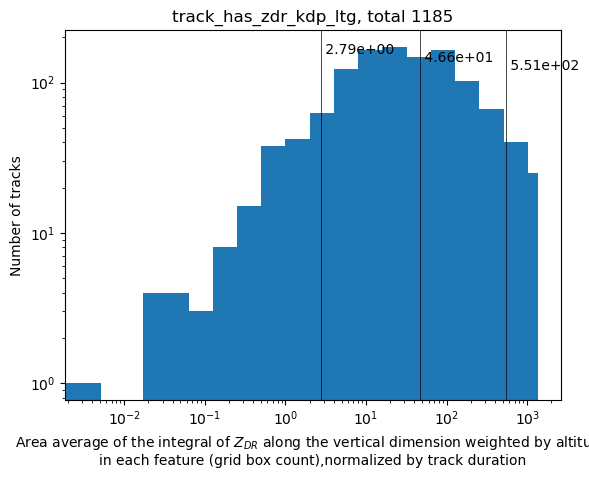

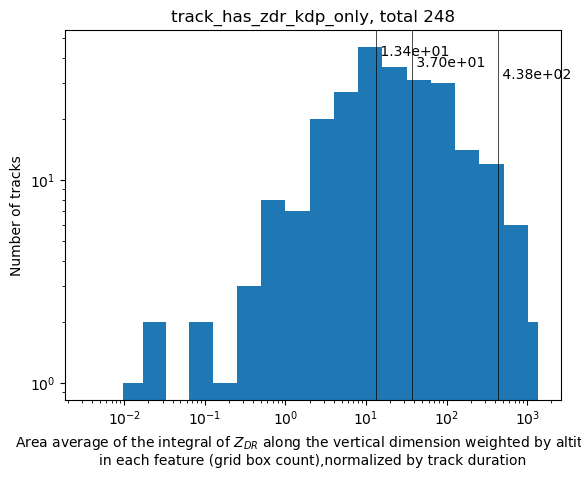

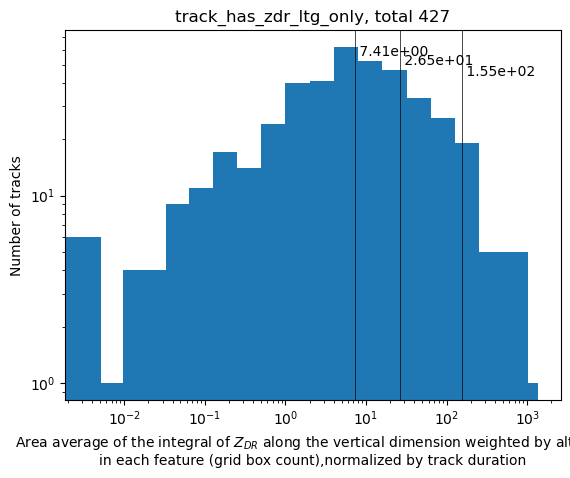

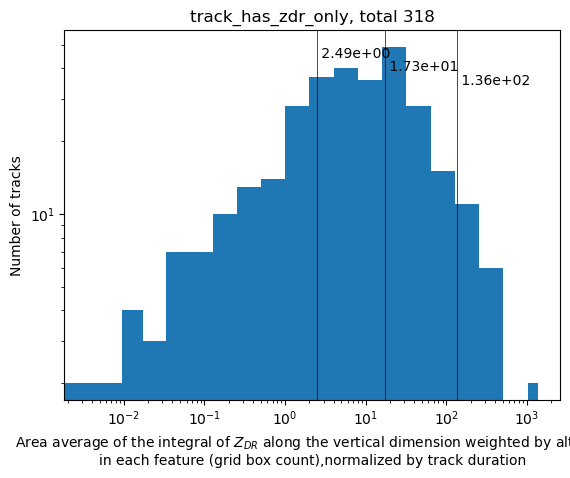

In [42]:
histo_var = 'feature_zdrwt_total_area_time_norm'

for title, p in pathstrings_all_zdr:
    all_zdr_figs = plot_1d_hists(aggregate_histos(p), var_names=['percentile_'+histo_var], title=title)
    outname = 'distribution_'+histo_var.replace('feature_', '').replace('_', '-')+'_for_'+title.replace('_', '-')+'.pdf'
    print(outname)
    all_zdr_figs[0].savefig(outname)

distribution_kdpwt-total-area-time-norm_for_track-has-zdr-kdp-ltg.pdf
distribution_kdpwt-total-area-time-norm_for_track-has-zdr-kdp-only.pdf


/tmp/ipykernel_838/1891211272.py:31: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


distribution_kdpwt-total-area-time-norm_for_track-has-kdp-only.pdf
distribution_kdpwt-total-area-time-norm_for_track-has-kdp-ltg-only.pdf


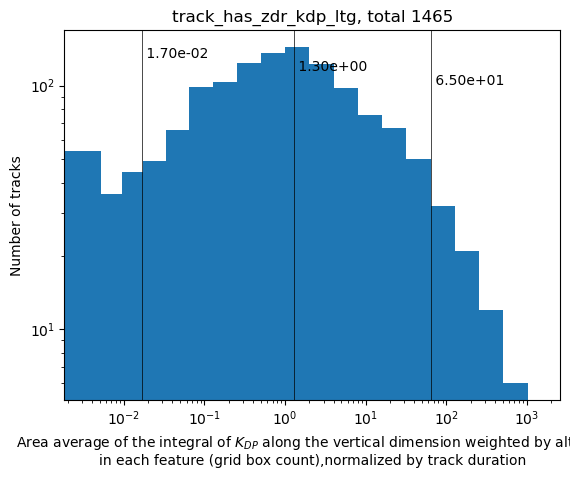

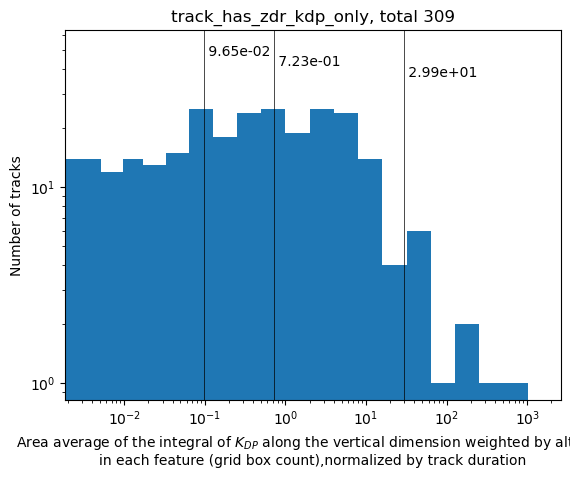

ValueError: Image size of 80891x336396 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

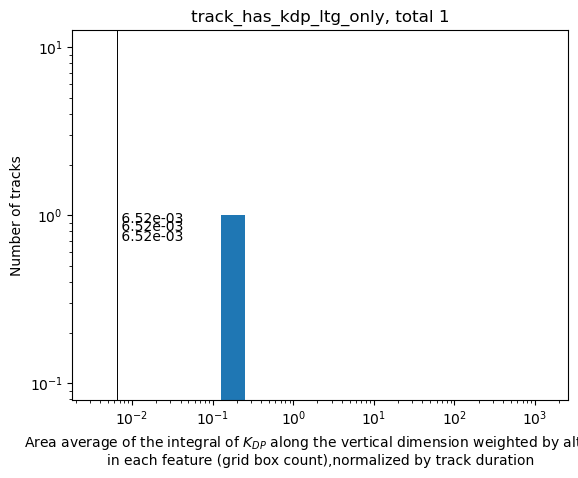

In [43]:
histo_var = 'feature_kdpwt_total_area_time_norm'

for title, p in pathstrings_all_kdp:
    all_kdp_figs = plot_1d_hists(aggregate_histos(p), var_names=['percentile_'+histo_var], title=title)
    outname = 'distribution_'+histo_var.replace('feature_', '').replace('_', '-')+'_for_'+title.replace('_', '-')+'.pdf'
    print(outname)
    all_kdp_figs[0].savefig(outname)
        